# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        01:56:21   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

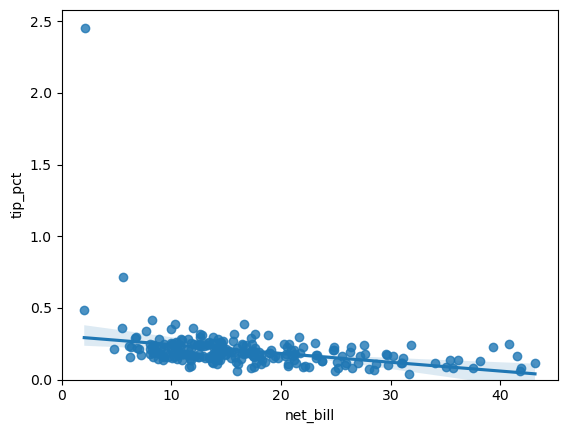

In [4]:
#Grafico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

#Opções esteticas para explicar o (0,0) no grafico
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [5]:
#Ajuste de modelo com o logaritmo net_bill
reg_log_net = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
reg_log_net.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.62e-13
Time:                        01:56:21   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

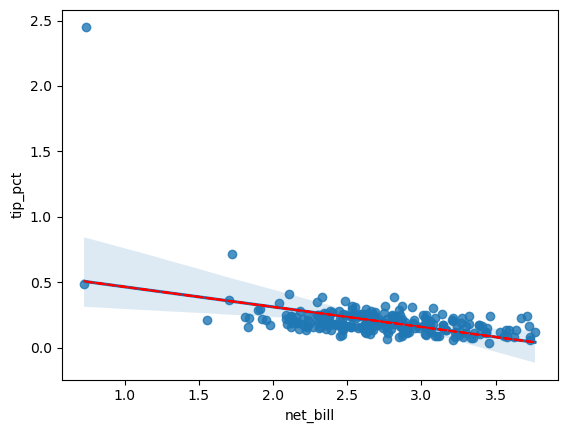

In [6]:
#Grafico de dispersao
sns.regplot(x = np.log(tips['net_bill']), y = 'tip_pct', data = tips)
plt.plot(np.log(tips['net_bill']), reg_log_net.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [7]:
reg_power_pct = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
reg_power_pct.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.06e-09
Time:                        01:56:22   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4851      0.047     10.332      0.000       0.393       0.578
net_bill                 -0.0268      0.005     -5.477      0.000      -0.036      -0.017
np.power(net_bill, 2)     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='net_bill', ylabel='tip_pct'>

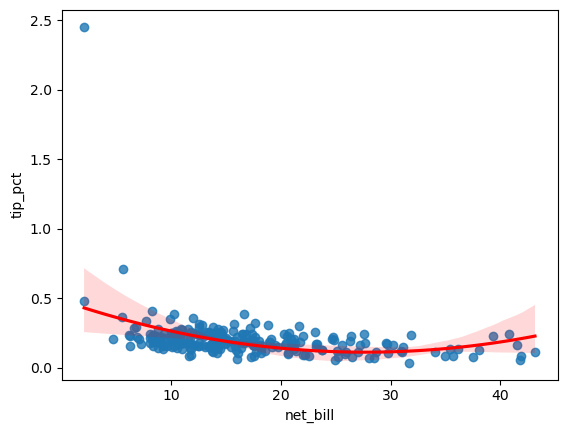

In [8]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips, order=2, line_kws={'color':'red'})

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [9]:
#Ajuste de modelo com o logaritmo tip_pct em funcao de net_bill
reg_log_pct = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg_log_pct.summary())


                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           8.27e-16
Time:                        01:56:22   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

Modelo no **log do tip_pct** em função de net_bill:

**R-squared: 0.235**

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.20e-20
Time:                        01:56:22   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

<Axes: xlabel='net_bill', ylabel='tip_pct'>

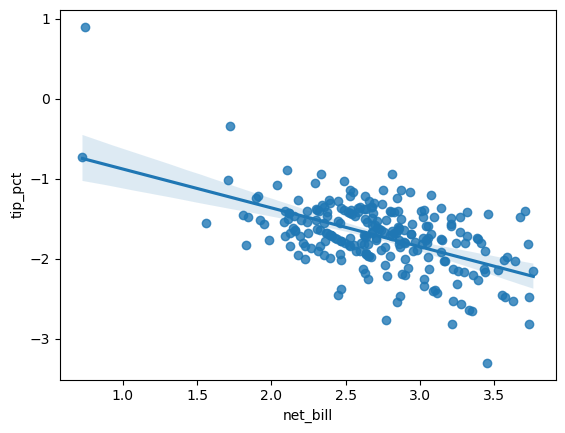

In [10]:
#Ajuste de modelo com o logaritmo tip_pct em funcao do logaritmo de net_bill
reg_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg_log.summary())

#Grafico de dispersao
sns.regplot(x = np.log(tips['net_bill']), y = np.log(tips['tip_pct']), data = tips)

Modelo no **log do tip_pct** em função do **log de net_bill**:

**R-squared: 0.293**

###  6. qual modelo resultou no melhor ajuste?

Comparação dos Resultados:

    1. Modelo Linear (tip_pct ~ net_bill) - R²: 0,091
    
    2. Modelo Log ('tip_pct ~ np.log(net_bill)') - R²: 0,202
    
    3. Modelo Polinomial de 2 Grau (tip_pct ~ net_bill + net_bill^2) - R²: 0,158
    
    4. Modelo Log tip_pct (np.log(tip_pct) ~ net_bill) - R²: 0,235
    
    5. Modelo Log Log (log(tip_pct) ~ log(net_bill)) - R²: 0,293


O modelo que resultou melhor ajuste foi o ultimo: **Modelo no log do tip_pct em função do log de net_bill** pois obteve o maior R².